In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 0)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 3)
np.set_printoptions(linewidth=1000)

In [2]:
enformer_df = pd.read_csv('../pretrained_models/data/Enformer_info.csv')
enformer_df

,identifier,assay,cell_type,target
0,ENCFF833POA,DNase,cerebellum male adult (27 years) and male adul...,DNase/cerebellum male adult (27 years) and mal...
1,ENCFF110QGM,DNase,frontal cortex male adult (27 years) and male ...,DNase/frontal cortex male adult (27 years) and...
2,ENCFF880MKD,DNase,chorion,DNase/chorion
3,ENCFF463ZLQ,DNase,Ishikawa treated with 0.02% dimethyl sulfoxide...,DNase/Ishikawa treated with 0.02% dimethyl sul...
4,ENCFF890OGQ,DNase,GM03348,DNase/GM03348
5,ENCFF996AEF,DNase,GM03348 genetically modified using transductio...,DNase/GM03348 genetically modified using trans...
6,ENCFF660YSU,DNase,AG08395,DNase/AG08395
7,ENCFF787MSC,DNase,AG08396,DNase/AG08396
8,ENCFF568LMQ,DNase,AG20443,DNase/AG20443
...,...,...,...,...


In [3]:
counter = Counter(enformer_df['assay'])
for a in counter.most_common(15):
    print(a)

('DNase', 674)
('CAGE', 638)
('ChIP-Histone:H3K4me3', 338)
('ChIP-Histone:H3K36me3', 269)
('ChIP-Histone:H3K27me3', 260)
('ChIP-Histone:H3K4me1', 259)
('ChIP-Histone:H3K9me3', 252)
('ChIP-Histone:H3K27ac', 228)
('ChIP-TF:CTCF', 205)
('ChIP-TF:.', 120)
('ChIP-Histone:H3K9ac', 98)
('ChIP-TF:POLR2A', 85)
('ChIP-TF:EP300', 54)
('ChIP-TF:H2AFZ', 45)
('ChIP-TF:POLR2AphosphoS5', 45)


In [9]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']
index_list = []
index_df = pd.DataFrame(index=cell_types, columns=assays)

for cell_type in cell_types:
    for assay in assays:
        # mask = (enformer_df['cell_type'].str.contains(cell_type)) & (enformer_df['assay'].str.contains(assay))
        mask = (enformer_df['cell_type'] == cell_type) & (enformer_df['assay'].str.contains(assay))
        index = enformer_df[mask].index.tolist()
        # print(enformer_df.iloc[index])
        index_df.loc[cell_type, assay] = index
        index_list.extend(index)

In [10]:
index_df

,DNase,H3K4me1,H3K4me3,H3K9me3,H3K27me3,H3K27ac,H3K36me3,CTCF,CAGE
HepG2,"[27, 91, 234]",[772],"[717, 1182, 3227]",[830],"[749, 1181]",[],[1180],[904],[]
K562,"[121, 122, 123, 625]",[1389],"[701, 1210, 1387, 3507]",[762],"[698, 1388]",[],"[699, 1209]","[697, 1012, 1211, 1347]",[]
SK-N-SH,[],"[1440, 3484]","[1441, 4439]","[1442, 3466]",[4279],"[1443, 3194]",[4450],"[1371, 3110]",[]
A549,[47],[],[1102],[],[],[],[],"[1084, 1242]",[]
HCT116,[88],"[1378, 1956]","[1173, 2467]",[2015],[3958],"[1379, 3485]",[1733],"[1055, 1172, 2203]",[]


In [46]:
enformer_df.iloc[index_list]

,identifier,assay,cell_type,target
27,ENCFF136DBS,DNase,HepG2,DNase/HepG2
91,ENCFF205TKQ,DNase,HepG2,DNase/HepG2
234,ENCFF577SOF,DNase,HepG2,DNase/HepG2
772,ENCFF058GCZ,ChIP-Histone:H3K4me1,HepG2,ChIP-Histone:H3K4me1/HepG2
717,ENCFF746CXV,ChIP-Histone:H3K4me3,HepG2,ChIP-Histone:H3K4me3/HepG2
1182,ENCFF777EVS,ChIP-Histone:H3K4me3,HepG2,ChIP-Histone:H3K4me3/HepG2
3227,ENCFF736LHE,ChIP-Histone:H3K4me3,HepG2,ChIP-Histone:H3K4me3/HepG2
830,ENCFF485BCI,ChIP-Histone:H3K9me3,HepG2,ChIP-Histone:H3K9me3/HepG2
749,ENCFF598TWA,ChIP-Histone:H3K27me3,HepG2,ChIP-Histone:H3K27me3/HepG2
1181,ENCFF419FUZ,ChIP-Histone:H3K27me3,HepG2,ChIP-Histone:H3K27me3/HepG2


In [47]:
# predicted_df = np.load('outputs/SirajMPRA_Enformer_no_padding.npy').mean(1)
predicted_df = np.load('outputs/SirajMPRA_Enformer_zero_padding.npy').mean(1)
print(predicted_df.shape)

(562654, 5313)


In [48]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']

# flatten_features = []
# for cell_type in cell_types:
#     for assay in assays:
#         flatten_features.append(f'{cell_type}_{assay}')

predicted_features_array = np.zeros((len(cell_types), len(assays), len(predicted_df)))
print(predicted_features_array.shape)

(5, 8, 562654)


In [49]:
MPRA_df = pd.read_csv('../data/SirajMPRA/SirajMPRA_563k.csv')
print(MPRA_df.shape)

(562654, 12)


In [50]:
MPRA_df

,description,seq,A549,HepG2,K562,SK-N-SH,HCT116,is_ref,chr,pos,ref,alt
0,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.668,-0.704,0.539,0.159,True,chr1,14677,G,A
1,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.416,0.554,0.442,-0.288,False,chr1,14677,G,A
2,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.270,-0.391,0.752,1.100,True,chr1,63697,T,C
3,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.152,-0.659,0.205,1.051,False,chr1,63697,T,C
4,chr1:64764:C:T,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211,-0.007,0.499,0.258,True,chr1,64764,C,T
5,chr1:64764:C:T,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,0.010,0.628,-0.578,0.010,False,chr1,64764,C,T
6,chr1:108230:C:T,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.333,-0.149,-1.049,-0.392,True,chr1,108230,C,T
7,chr1:108230:C:T,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.738,-0.272,-0.271,-0.348,False,chr1,108230,C,T
8,chr1:108826:G:C,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.608,0.234,0.511,-0.054,True,chr1,108826,G,C
...,...,...,...,...,...,...,...,...,...,...,...,...


In [51]:
# only select the first channel

pearson_array = np.zeros((len(cell_types), len(assays)))
for c, cell_type in enumerate(cell_types):
    for a, assay in enumerate(assays):
        mask = (enformer_df['cell_type'] == cell_type) & (enformer_df['assay'].str.contains(assay))
        indice = enformer_df[mask].index.tolist()
        if indice:
            i = indice[0]
            predicted_feature = predicted_df[:, i]
            true_label = MPRA_df[cell_type]
            r = pearson(predicted_feature, true_label)
            # print(cell_type, assay, i)
            # print(r)
            predicted_features_array[c, a] = predicted_feature
            pearson_array[c, a] = r

print(pearson_array)
print(predicted_features_array.mean(-1))

[[ 0.40116292  0.38627186  0.47331062 -0.0836539   0.10212349  0.          0.11797908  0.15824796]
 [ 0.2321001   0.27257966 -0.04624312 -0.08579148 -0.06795139  0.         -0.15694157  0.14172342]
 [ 0.          0.19537691  0.37844825  0.15979503 -0.17568659  0.19370631 -0.07373901  0.09268305]
 [ 0.31877347  0.          0.28264267  0.          0.          0.          0.          0.16812665]
 [ 0.30865354  0.2101097   0.28860745 -0.00940428 -0.15630738  0.19700527 -0.11918949  0.11523694]]
[[0.0833712  0.97626707 0.97816395 3.14052735 1.02473738 0.         0.67402168 1.35453809]
 [0.01476622 0.20788324 0.67615184 2.54541619 0.48277069 0.         0.39427374 0.68729184]
 [0.         1.06322577 0.72072685 2.61891484 1.37002517 0.59161633 1.92537182 1.25666328]
 [0.06585577 0.         0.86823976 0.         0.         0.         0.         1.55695131]
 [0.08261803 0.73251987 0.66164587 1.08156559 0.9755198  0.62640793 0.93912312 1.20578612]]


In [52]:
# average every channel

pearson_array = np.zeros((len(cell_types), len(assays)))
for c, cell_type in enumerate(cell_types):
    for a, assay in enumerate(assays):
        mask = (enformer_df['cell_type'] == cell_type) & (enformer_df['assay'].str.contains(assay))
        indice = enformer_df[mask].index.tolist()
        if indice:
            predicted_feature = predicted_df[:, indice].mean(1)
            true_label = MPRA_df[cell_type]
            r = pearson(predicted_feature, true_label)
            # print(cell_type, assay)
            # print(r)
            predicted_features_array[c, a] = predicted_feature
            pearson_array[c, a] = r

print(pearson_array)
print(predicted_features_array.mean(-1))

[[ 0.3606729   0.38627186  0.44379862 -0.0836539   0.10252135  0.          0.11797908  0.15824796]
 [ 0.25111263  0.27257966  0.07143376 -0.08579148 -0.00424978  0.         -0.06036106  0.1483983 ]
 [ 0.          0.19946867  0.35384389  0.07153209 -0.17568659  0.22202504 -0.07373901  0.08866405]
 [ 0.31877347  0.          0.28264267  0.          0.          0.          0.          0.14974057]
 [ 0.30865354  0.2366142   0.28865179 -0.00940428 -0.15630738  0.14021287 -0.11918949  0.13302546]]
[[0.06521211 0.97626707 0.89661826 3.14052735 1.01676316 0.         0.67402168 1.35453809]
 [0.01412642 0.20788324 0.58502621 2.54541619 0.30014377 0.         0.54295878 0.93957823]
 [0.         1.32966352 1.21393423 2.5759665  1.37002517 0.82396737 1.92537182 1.37180441]
 [0.06585577 0.         0.86823976 0.         0.         0.         0.         1.59968119]
 [0.08261803 0.74246962 0.74028971 1.08156559 0.9755198  0.8212688  0.93912312 1.27338471]]


/tmp/ipykernel_21706/424784206.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


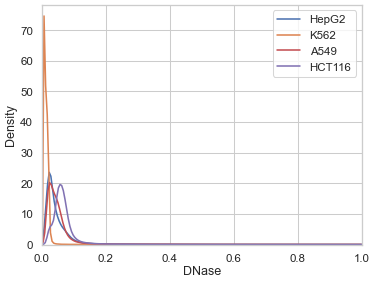

/tmp/ipykernel_21706/424784206.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


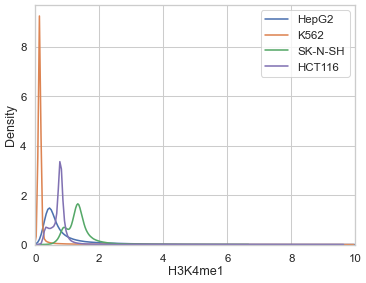

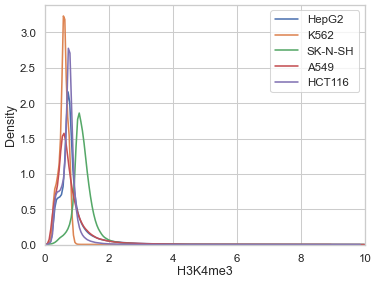

/tmp/ipykernel_21706/424784206.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


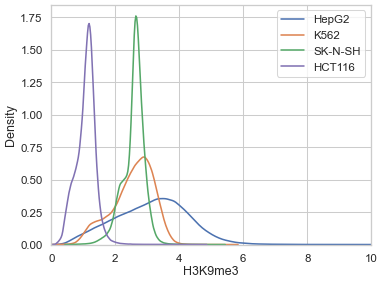

/tmp/ipykernel_21706/424784206.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


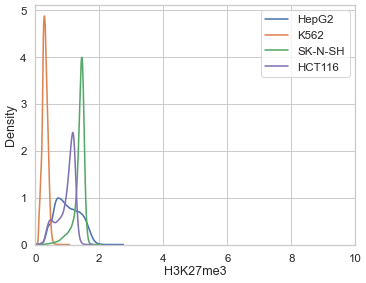

/tmp/ipykernel_21706/424784206.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)
/tmp/ipykernel_21706/424784206.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)
/tmp/ipykernel_21706/424784206.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


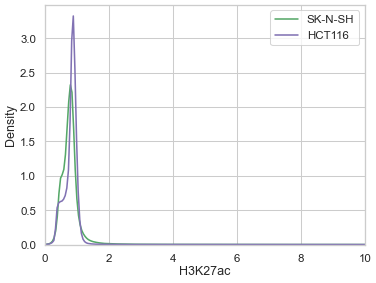

/tmp/ipykernel_21706/424784206.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x, label=cell_type)


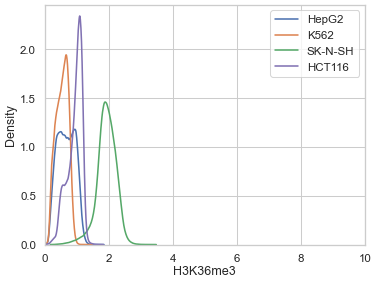

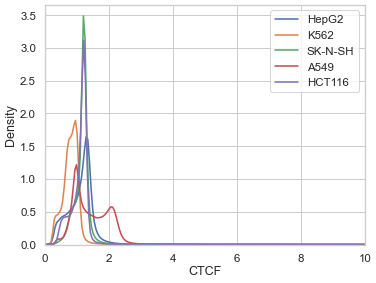

In [53]:
for j, assay in enumerate(assays):
    if assay == 'DNase':
        max_value = 1
    else:
        max_value = 10
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for i, cell_type in enumerate(cell_types):
        x = predicted_features_array[i, j]
        x = x[x<max_value]
        sns.kdeplot(x, label=cell_type)
    plt.xlabel(f'{assay}')
    plt.xlim(0, max_value)
    plt.legend()
    # plt.savefig(f'figures/signal_log_kde/{assay}.png', dpi=200)
    plt.show()

In [5]:
# # # 定义细胞所有可能的名字
# aliases_dict = {
#     'HepG2': [
#         r"hepg2",
#         r"hepatocellular[_\s-]*carcinoma",
#         r"hep[_\s-]*g[_\s-]*2",
#         ],
#     'K562': [
#         r"K562",
#     ],
#     'SK-N-SH': [
#         r"neuroblastoma",
#         r"SKNSH",
#         r"SK-N-SH",
#     ],
#     'A549': [
#         r"A549",
#     ],
#     'HCT116': [
#         r"HCT116",
#         r"colon",
#     ],
#     'WTC11': [
#         r"WTC11",
#         r"WTC"
#         r"iPS",
#         r"UCSFi001-A"
#         r"GM25256",
#     ],
# }



# assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']
# cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

# for cell_type in cell_types:
#     aliases = aliases_dict[cell_type]
#     pattern = re.compile("|".join(aliases), re.IGNORECASE) # 不区分大小写
#     matched_indice = [i for i in range(len(info_df))
#                       if (pattern.search(info_df['cell_type'][i])) and (info_df['assay'][i] in assays)]